## 구글 드라이브 마운트

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## 필요 패키지 및 라이브러리 추가

In [2]:
# pip install opencv-python
# pip install cmake
# pip install dlib

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
print("🌫🛸")

🌫🛸


## 사진 불러오기

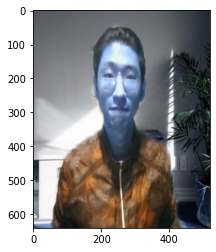

In [4]:
import os
my_image_path = '/content/drive/MyDrive/AIFFEL 대전/Exploration/[E3]sticker/image/my.PNG'
img_bgr = cv2.imread(my_image_path, 1)    # OpenCV로 이미지를 불러오기
img_bgr = cv2.resize(img_bgr, (520, 640)) # 520*640의 크기로 Resize
img_show = img_bgr.copy()                 # 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

## detector 설정

In [5]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   # detector 선언(얼굴위치 인식)
print("🌫🛸")

🌫🛸


In [6]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print("🌫🛸")

🌫🛸


## 얼굴 영역 확인 및 저장

rectangles[[(159, 139) (345, 325)]]


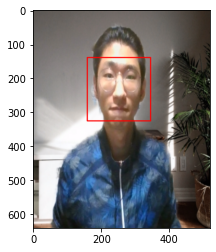

In [7]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,0,255), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## landmark 패키지 다운

* 알집 다운로드, 압축 해제, predictor 생성

In [8]:
#! wget -P /content/drive/MyDrive/AIFFEL 대전/Exploration/[E3]sticker/model/ http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 #코랩에선 띄어쓰기 앞에 \을 붙여주지 않으면 인식하지 못함

In [9]:
#이 부분에서 한참 헤맸습니다. 일단 코랩에선 root디렉토리를 %cd로 찾아가더라구요. 그리고 코드에  model이 디렉토리 경로와 알집 푸는 부분에 중복으로 써있어서 뭐때문에 파일이나 디렉토리가 없다는 건지도 모르고 반복했습니다.

# %cd 프로젝트 위치
#%cd /content/drive/MyDrive/AIFFEL 대전/Exploration/[E3]sticker/model && bzip2 -d ./shape_predictor_68_face_landmarks.dat.bz2 # 파일 압축해제

In [10]:
import os
model_path = '/content/drive/MyDrive/AIFFEL 대전/Exploration/[E3]sticker/model/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


빈 리스트(list_landmarks)를 만들고 위에서 그린 사각형 범위 안에 landmark 좌표 확인 및 입력

In [11]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))# landmarks 안에 list로 넣는 것은 얼굴 좌표가 여러개 나올 때 인덱스로 접근하기 위함인가?
    list_landmarks.append(list_points)

print((list_landmarks))
print(len(list_landmarks[0]))

[[(186, 189), (184, 211), (186, 234), (188, 256), (194, 277), (203, 297), (215, 315), (230, 328), (249, 333), (268, 330), (284, 320), (296, 305), (307, 287), (313, 268), (318, 246), (320, 225), (320, 205), (203, 166), (210, 155), (222, 151), (235, 154), (245, 162), (268, 166), (278, 161), (291, 161), (302, 165), (309, 176), (255, 191), (256, 210), (256, 230), (257, 249), (239, 257), (247, 261), (255, 264), (263, 262), (270, 258), (213, 192), (220, 190), (228, 191), (234, 196), (227, 198), (219, 196), (277, 199), (284, 196), (292, 196), (299, 199), (292, 202), (284, 202), (227, 289), (238, 285), (246, 283), (254, 285), (261, 283), (268, 287), (276, 293), (268, 297), (260, 299), (252, 300), (244, 298), (236, 296), (232, 290), (246, 290), (253, 291), (260, 290), (272, 293), (260, 288), (253, 289), (245, 288)]]
68


## 얼굴 윤곽, landmark, 스티커 적용

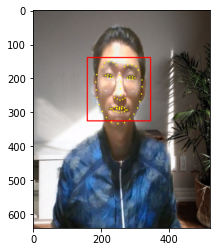

In [12]:
for landmark in list_landmarks:
    for idx, point in enumerate(landmark): # 인덱스 번호와 원소를 튜플 형태로 출력
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow
                                #점크기   #rgb값      
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 좌표로 사진 위치 핸들링

이미지 위치의 기준으로 삼을 x축과 y축 좌표, 그리고 스티커의 높이와 폭을 나타내는 w와 h값을 지정

In [13]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 
    x = landmark[30][0]
    y = landmark[30][1]
    w = landmark[11][0] - landmark[5][0]
    h = landmark[51][1] - landmark[29][1]


    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(257, 249)
(x,y) : (257,249)
(w,h) : (93,55)


## 적용할 스티커 준비하기

* 해당 코드는 고양이 수염 사진을 불러와서 landmark를 활용한 좌표를 기준으로 폭과 높이를 재설정
* 높이 75, 폭 185의 3채널 이미지

In [14]:
import os
sticker_path = '/content/drive/MyDrive/AIFFEL 대전/Exploration/[E3]sticker/image/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)


(55, 93, 3)


* 이미지의 시작점은 좌상단
* 사진을 원하는 지점에 위치하게 하기위해 x, y 좌표를 기준으로 좌표이동

In [15]:
refined_x = round(landmark[30][0] - w/2)
refined_y = round(landmark[30][1] - h/2)
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (210,222)


## 이미지에 표시

* 원본 이미지에 사진을 붙일 영역 표시

In [16]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

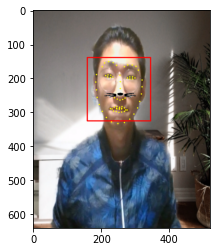

In [17]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

## 이미지 출력 및 저장

* 원본사진에 수염을 합성한 이미지 출력
* 투명도 조절을 위해 수염 합성 이미지 저장

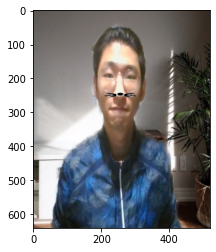

True

In [18]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
cv2.imwrite('/content/drive/MyDrive/AIFFEL 대전/Exploration/[E3]sticker/image/my_inv.png', img_rgb)


## 투명도 조절

* 원본이미지와 저장한 이미지 로드
* cv2.addWeighted()을 사용하여 투명도 조절

(640, 520, 3) (640, 520, 3)


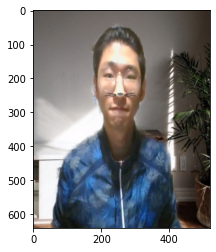

In [19]:
import cv2
import numpy as np
img1 = cv2.imread('/content/drive/MyDrive/AIFFEL 대전/Exploration/[E3]sticker/image/my.PNG')
img1 = cv2.resize(img1, (520, 640))    # 640x360의 크기로 Resize
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('/content/drive/MyDrive/AIFFEL 대전/Exploration/[E3]sticker/image/my_inv.png')
print(img1.shape, img2.shape)
dst = cv2.addWeighted(img1, 0.5, img2, 0.5, 0)
plt.imshow(dst)



## 루브릭 평가항목


### 1.   카메라 앱 기능 구현
* 원본에 정상적으로 합성되었습니다.
* 수염을 반투명으로 적용하여 보다 자연스럽게 표현되었습니다.

### 2.   스티커 이미지를 정확한 위치에 반영
* 원본 이미지의 원하는 위치에 고양이 수염이 위치하였습니다.
  * landmark의 30번 인덱스를 기준으로 x, y좌표를 설정하여 위치하게 했습니다. 
* 원하는 크기의 고양이 수염이 적용되었습니다.
  * 고양이 수염이 적당한 크기로 적용되도록 landmark의 11번 인덱스와 5번 인덱스의 y좌표를 폭으로 사용하였고 29번 인덱스의 x좌표와 51번 인덱스의 x좌표를 높이로 사용하였습니다.
    
### 3.   카메라 스티커앱을 다양한 원본이미지에 적용했을 때의 문제점을 체계적으로 분석
* 우선 다양한 사진에 적용

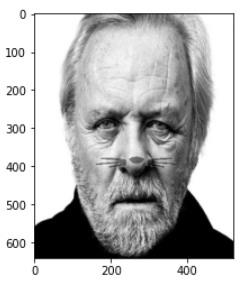



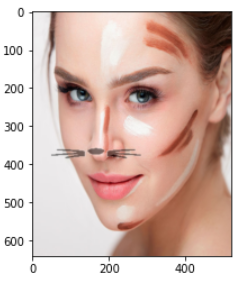




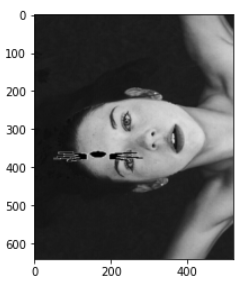



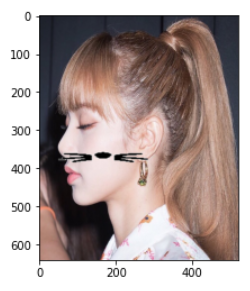



* 이미지 밝기, 각도의 문제
 * 이미지의 특징에 따라 landmark를 인식하지 못하는 경우가 발생했습니다. 약 16장의 이미지를 확인한 결과, 일반적으로 다음과 같은 경우 인식하지 못했습니다. 밝은 흑백이미지는 인식하였으나, 이미지의 명암이 landmark의 기준이 되는 윤곽선을 인식하지 못할 정도로 짙은경우, landmark의 list를 반환하지 못했습니다. 얼굴 윤곽을 인식하지 못하는 문제는 완전히 옆을 보고 있는 사진, 마스크를 끼고 있는 사진, 모자를 깊이 눌러쓴 사진, 그리고 옆으로 누워있는 사진등에 동일하게 나타났습니다. 우리가 활용한 dlib 모델의 face landmark localization의 학습 데이터상의 문제로 보이며 보다 다양한 경우를 고려한 학습이 필요할 것으로 보입니다.

 * 높이(h)를 설정할 때 좌, 우 얼굴 윤곽선을 기준으로 하니 각도에 따라 문제가 발생하였습니다. 그래서 코를 기준으로 재설정하였습니다. 

* 스티커앱에서 속도와 정확도의 중요성
 * 실행속도와 정확도는 중요한 문제라고 생각합니다. 사진촬영 후 자동으로 스티커를 지정된 위치에 붙여주는 어플의 경우, 실시간 연산이 크게 필요하지 않아 속도를 염두에 두지 않아도 될 것입니다. 그러나 이번 프로젝트와 같은 어플을 사용하는 경우 일반적으로 사진 촬영이나 동영상 촬영이 목적입니다. 실시간으로 정확한 얼굴 위치에 스티커가 반영되어야 의미가 있습니다. 이런 특성을 반영하지 못한다면, 해당 어플은 가치가 상당히 떨어질 것입니다.

# 회고..

* ### 어려웠던 점
이번 노드는 파이썬 코드를 이해하는 것부터 어려웠습니다. 지정된 위치에 무엇이 들어가야 하는지도 모르겠고, 지식이 부족해 뭘 어떻게 해야할지도 모르겠어서 오전 오후를 전부 코드 이해하는 데 사용한것 같습니다. 그리고 어떻게든 진행했지만 고양이 수염사진의 배경이 검은색으로 나타나는 문제가 발생하여 해결하지 못한 채 많은 시간을 보냈습니다. 그러다 목요일, os문제가 생겨 기존 코드를 복구하지 못한 채 윈도우os의 다른 노트북에서 처음부터 다시 시작하였습니다. 코랩에서 작성하여 경로문제, cmd명령어 문제 등 사소하지만 성가신 문제들로 시간을 허비했습니다만 처음부터 다시 작성하니 2회차라 수월했고 검정배경도 나타나지 않았습니다(제 코드의 문제였던것 같습니다).

* ### 느낀점
전체적인 노드를 보면 시각적인 결과물이 나오는 노드는 처음이었는데 재밌었습니다. 루브릭 평가 후반부의 다양한 문제에 대해 고민해보면서 나름대로 많은 사고를 한 것도 의미있었습니다. 많은 사진을 접목시켜 보고 케이스별로 나타나는 문제들과 해결 방안에 대해 생각해본 것(능력 부족으로 구현하지는 못했지만)도 나름 재밌었고 많은 도움이 될 것 같습니다.


 * #  **백업을 생활화합시다**

